In [1]:
import duckdb



%load_ext sql
# conn = duckdb.connect()
conn = duckdb.connect('db.duckdb')
%sql conn --alias duckdb

%config SqlMagic.autopandas = False
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

setup_cmds = [
    "create view if not exists authors as select * from read_parquet('data/oalex/parquet/oa_authors_merged_parquet/*.parquet')",
    "create view if not exists works_full as select * from read_parquet('data/oalex/parquet/works_parquet/*.parquet')",
    "create view if not exists works_open as select * from read_parquet('data/oalex/parquet/works_oa_only/*.parquet')",
    "create view if not exists works_min as select * from read_parquet('data/oalex/parquet/oa_works_unrolled_authors_parquet2/*.parquet')",
    "create view if not exists authors_social_science as select * from 'data/oalex/authors_social_science.jsonl.zst'",
    "create view if not exists magic_dois as select * from read_parquet('data/oalex/parquet/magic_dois_parsed_parquet/*.parquet')",
    "create view if not exists work_author_index as select * from read_parquet('data/oalex/parquet/work_author_index_parquet/*.parquet')"
]
ipython = get_ipython()
for cmd in setup_cmds:
    duckdb.sql(cmd)
    ipython.run_cell_magic('sql', '', cmd)

# duckdb.sql("create view if not exists authors as select * from read_parquet('data/oalex/oa_authors_merged_parquet/*.parquet')")
# duckdb.sql("create view if not exists works_full as select * from read_json('data/oalex/works/*/*.gz')")
# duckdb.sql("create view if not exists works_min as select * from read_parquet('data/oalex/oa_works_unrolled_authors_parquet2/*.parquet')")

# %sql create view if not exists authors as select * from read_parquet('data/oalex/oa_authors_merged_parquet/*.parquet')
# %sql create view if not exists works_full as select * from read_json('data/oalex/works/*/*.gz')
# %sql create view if not exists works_min as select * from read_parquet('data/oalex/oa_works_unrolled_authors_parquet2/*.parquet')

# gz_path = 'data/oalex/authors/*/*.gz'

# test_query = duckdb.sql(f"select column_name, column_type from (describe select * from read_json('{gz_path}'))").fetchall()

# base_schema = dict(test_query)
# fields_to_stringify = ['ids']
# base_schema = base_schema | {field: 'VARCHAR' for field in fields_to_stringify}




# print(test_query)

Tip: You may define configurations in /mnt/storage/python/pcurves/pyproject.toml or /home/nonagon/.jupysql/config.

Did not find user configurations in /mnt/storage/python/pcurves/pyproject.toml.

In [ ]:
def download_author_papers(duck_conn: duckdb.DuckDBPyConnection, author_id: str):
    duck_conn.sql(f"select * from lookup_index where author_id = '{author_id}'").fetchall()

download_author_papers(conn, 'https://openalex.org/A5023637810')



In [22]:
%sql describe select * from read_parquet('data/oalex/parquet/works_with_sources_merged_parquet/*.parquet')

column_name,column_type,null,key,default,extra
id,VARCHAR,YES,None,None,None
display_name,VARCHAR,YES,None,None,None
doi,VARCHAR,YES,None,None,None
pdf_url,VARCHAR,YES,None,None,None
is_oa,VARCHAR,YES,None,None,None
landing_page_url,VARCHAR,YES,None,None,None
author_id,VARCHAR,YES,None,None,None
author_is_first,BOOLEAN,YES,None,None,None
doi_in_magic,VARCHAR,YES,None,None,None


In [2]:
%sql PRAGMA max_temp_directory_size='1000GiB'

%sql ATTACH 'data_authors.duckdb' as authors_db;

%sql DROP TABLE IF EXISTS authors_db.authors;
%sql CREATE TABLE authors_db.authors as (select * from authors);
%sql CREATE INDEX authors_db.authors_id ON authors(id);
%sql DETACH authors_db;


RuntimeError: If using snippets, you may pass the --with argument explicitly.
For more details please refer: https://jupysql.ploomber.io/en/latest/compose.html#with-argument


Original error message from DB driver:
Catalog Error: Table with name authors_parquet does not exist!
Did you mean "authors"?
LINE 1: ...E authors_db.authors as (select * from authors_parquet);
                                                  ^

If you need help solving this issue, send us a message: https://ploomber.io/community


In [26]:
%sql DROP TABLE IF EXISTS lookup_index;

Success


In [2]:
%sql CREATE TABLE lookup_index as (select * from read_parquet('data/oalex/parquet/works_with_sources_merged_parquet/*.parquet'));

Count
686507101


In [3]:
%sql CREATE INDEX work_author_index_author_id ON lookup_index(author_id);

Count


In [28]:
%sql select id from authors_social_science offset 100000 limit 10;

id
https://openalex.org/A5023568951
https://openalex.org/A5023582917
https://openalex.org/A5023597853
https://openalex.org/A5023618534
https://openalex.org/A5023630109
https://openalex.org/A5023637810
https://openalex.org/A5023646618
https://openalex.org/A5023647200
https://openalex.org/A5023658444
https://openalex.org/A5023666091


In [17]:
%sql select * from lookup_index where author_id = 'https://openalex.org/A5023637810' limit 10;

id,doi,pdf_url,is_oa,landing_page_url,author_id,author_is_first,doi_in_magic
https://openalex.org/W2410365511,https://doi.org/10.48513/joted.v4i1.52,None,None,None,https://openalex.org/A5023637810,True,None
https://openalex.org/W2394323333,https://doi.org/10.3217/zfhe-11-03/03,None,true,https://doi.org/10.3217/zfhe-11-03/03,https://openalex.org/A5023637810,True,None
https://openalex.org/W3084304522,https://doi.org/10.17885/heiup.heied.2019.4.24024,None,None,None,https://openalex.org/A5023637810,True,None


In [39]:
work_id_res = conn.sql("select id from work_author_index where author_id = 'https://openalex.org/A5023637810'").fetchall()
work_ids = [r[0] for r in work_id_res]
in_string = "'" + "','".join(work_ids) + "'"

res = duckdb.sql(f"select * from works_full where id = '{work_ids[0]}'").fetchall()

# %sql select id from works_full where id in (select id from work_author_index where author_id = 'https://openalex.org/A5023637810');

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [40]:
len(res)

1

In [34]:
work_ids

[('https://openalex.org/W3084304522',),
 ('https://openalex.org/W2394323333',),
 ('https://openalex.org/W2410365511',)]

In [105]:
%sql copy (select * from read_parquet('data/oalex/parquet/works_parquet/*.parquet')) to 'data/oalex/parquet/works_parquet2' (FORMAT 'parquet', CODEC 'zstd', PER_THREAD_OUTPUT, OVERWRITE)

count_star()
259375778


In [9]:
%config SqlMagic.displaylimit = 100
%sql describe select * from works_open;

column_name,column_type,null,key,default,extra
id,VARCHAR,YES,None,None,None
doi,VARCHAR,YES,None,None,None
doi_registration_agency,VARCHAR,YES,None,None,None
display_name,VARCHAR,YES,None,None,None
title,VARCHAR,YES,None,None,None
publication_year,BIGINT,YES,None,None,None
publication_date,DATE,YES,None,None,None
language,VARCHAR,YES,None,None,None
ids,"STRUCT(openalex VARCHAR, doi VARCHAR, pmid VARCHAR, mag BIGINT, pmcid VARCHAR, arxiv_id VARCHAR)",YES,None,None,None
primary_location,"STRUCT(source STRUCT(id VARCHAR, issn_l VARCHAR, issn VARCHAR[], display_name VARCHAR, publisher VARCHAR, host_organization VARCHAR, host_organization_name VARCHAR, host_organization_lineage VARCHAR[], host_organization_lineage_names VARCHAR[], is_oa BOOLEAN, is_in_doaj BOOLEAN, host_institution_lineage VARCHAR[], host_institution_lineage_names VARCHAR[], publisher_lineage VARCHAR[], publisher_lineage_names VARCHAR[], publisher_id VARCHAR, ""type"" VARCHAR), pdf_url VARCHAR, landing_page_url VARCHAR, is_oa BOOLEAN, ""version"" VARCHAR, license JSON, doi VARCHAR, is_accepted BOOLEAN, is_published BOOLEAN)",YES,None,None,None


In [25]:
%%sql
copy (
with work_authorship as (select id, display_name, type, doi, best_oa_location->>'pdf_url' as pdf_url, best_oa_location->>'is_oa' as is_oa, best_oa_location->>'landing_page_url' as landing_page_url, unnest(authorships) as authorship from works_full),
work_authorships_cleaned as (select id, display_name, type, doi, pdf_url, is_oa, landing_page_url, authorship['author']['id'] as author_id, authorship['author_position'] = 'first' as author_is_first from work_authorship),
joined_with_magic as (select work_authorships_cleaned.*, magic_dois.doi as doi_in_magic from work_authorships_cleaned left join magic_dois on work_authorships_cleaned.doi = magic_dois.parsed_doi)
select * from joined_with_magic)
to 'data/oalex/parquet/works_with_sources_merged_parquet' (FORMAT 'parquet', CODEC 'zstd', PER_THREAD_OUTPUT, OVERWRITE)
;





Count
686507101


In [3]:
%config SqlMagic.displaylimit = None


displaylimit: Value None will be treated as 0 (no limit)

In [6]:
%sql SELECT count(*) FROM works_full;

count_star()
259375778


In [99]:
import os


def convert_to_parquet(folder: str, base = 'data/oalex/', input_prefix: str | None = None):
    input_prefix = input_prefix or (base + folder)
    input_path = input_prefix + "/*/*.gz"
    output_path = base + "parquet/" + folder + "_parquet"
    if os.path.exists(output_path):
        return
    print(f"Doing {folder}")
    query = f"copy (select * from read_json('{input_path}')) to '{output_path}' (FORMAT 'parquet', CODEC 'zstd', PER_THREAD_OUTPUT, OVERWRITE)"
    return duckdb.sql(query)


convert_to_parquet('institutions')
convert_to_parquet('concepts')
convert_to_parquet('domains')
convert_to_parquet('fields')
convert_to_parquet('funders')
convert_to_parquet('publishers')
convert_to_parquet('sources')
convert_to_parquet('subfields')
convert_to_parquet('topics')


In [100]:

convert_to_parquet('works', input_prefix='data-s3/data/works')

Doing works


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [11]:
import duckdb.typing
def try_parse_doi_udf(doi: str):
    parts = doi.split('/')
    res = doi
    if len(parts) > 2:
        # drop middle part
        res = (parts[0] + '/' + '.'.join(parts[2:]))
    return 'https://doi.org/' + res.lower()


try:
    conn.remove_function('try_parse_doi')
except Exception as e:
    pass
conn.create_function('try_parse_doi', try_parse_doi_udf, [duckdb.typing.VARCHAR], duckdb.typing.VARCHAR)

In [12]:
%sql select doi, try_parse_doi(doi) as parsed_doi from magic_dois OFFSET 1000

DOI,parsed_doi
10.0000/absimage.aps.org/generic-FE7A11EBFB92,https://doi.org/10.0000/generic-fe7a11ebfb92
10.0000/absimage.aps.org/generic-FF9D87FFA8BA,https://doi.org/10.0000/generic-ff9d87ffa8ba
10.0000/abstractairanica.revues.org/597d4ea924da018af9dd,https://doi.org/10.0000/597d4ea924da018af9dd
10.0000/abstractairanica.revues.org/74707f3800371d8dd3e6,https://doi.org/10.0000/74707f3800371d8dd3e6
10.0000/abstractairanica.revues.org/9983728a3608e7538be8,https://doi.org/10.0000/9983728a3608e7538be8
10.0000/abstractairanica.revues.org/generic-45EE50C4B1E7,https://doi.org/10.0000/generic-45ee50c4b1e7
10.0000/abstractairanica.revues.org/generic-86466E824F3C,https://doi.org/10.0000/generic-86466e824f3c
10.0000/ac.els-cdn.com/0022404982900846,https://doi.org/10.0000/0022404982900846
10.0000/ac.els-cdn.com/0065227x83900084,https://doi.org/10.0000/0065227x83900084
10.0000/ac.els-cdn.com/0065227x8490008x,https://doi.org/10.0000/0065227x8490008x


In [13]:
%sql copy (select doi, try_parse_doi(doi) as parsed_doi from magic_dois) to 'data/oalex/parquet/magic_dois_parsed_parquet' (FORMAT 'parquet', CODEC 'zstd', PER_THREAD_OUTPUT, OVERWRITE);

Count
85104374


In [17]:
%sql select * from magic_dois

DOI,parsed_doi
10.0000//case.edu/law/10000001,https://doi.org/10.0000/case.edu.law.10000001
10.0000//kluwerlawonline.com/14.7/GTCJ2019042,https://doi.org/10.0000/kluwerlawonline.com.14.7.gtcj2019042
10.0000//kronk.spb.ru/library/bolshakov-og-1980.htm,https://doi.org/10.0000/kronk.spb.ru.library.bolshakov-og-1980.htm
10.0000//www.ncbi.nlm.nih.gov/pubmed/2963548,https://doi.org/10.0000/www.ncbi.nlm.nih.gov.pubmed.2963548
10.0000//<1234567>,>https://doi.org/10.0000/<1234567>
10.0000//<2004/01>,>https://doi.org/10.0000/<2004.01>
10.0000//<615007>,>https://doi.org/10.0000/<615007>
10.0000//<9B19C016>,>https://doi.org/10.0000/<9b19c016>
10.0000//,>https://doi.org/10.0000/
10.0000//,>https://doi.org/10.0000/


In [18]:
%%sql
select *, is_oa or (doi in (select parsed_doi from magic_dois)) as is_oa_or_magic from works_min limit 10
;

id,doi,is_oa,author_id,is_oa_or_magic
https://openalex.org/W1992233318,https://doi.org/10.1016/0003-4975(94)01056-0,False,https://openalex.org/A5102843738,True
https://openalex.org/W1992233318,https://doi.org/10.1016/0003-4975(94)01056-0,False,https://openalex.org/A5061655266,True
https://openalex.org/W1992233318,https://doi.org/10.1016/0003-4975(94)01056-0,False,https://openalex.org/A5083256464,True
https://openalex.org/W1992233318,https://doi.org/10.1016/0003-4975(94)01056-0,False,https://openalex.org/A5073877566,True
https://openalex.org/W1992233318,https://doi.org/10.1016/0003-4975(94)01056-0,False,https://openalex.org/A5019233938,True
https://openalex.org/W1992233318,https://doi.org/10.1016/0003-4975(94)01056-0,False,https://openalex.org/A5055301273,True
https://openalex.org/W1992233318,https://doi.org/10.1016/0003-4975(94)01056-0,False,https://openalex.org/A5079351001,True
https://openalex.org/W2315900148,https://doi.org/10.1021/np4009392,False,https://openalex.org/A5049136138,True
https://openalex.org/W2315900148,https://doi.org/10.1021/np4009392,False,https://openalex.org/A5047719236,True
https://openalex.org/W2315900148,https://doi.org/10.1021/np4009392,False,https://openalex.org/A5040402515,True


In [32]:
%%sql
with works_min_aug as (select *, is_oa or (doi in (select parsed_doi from magic_dois)) as is_oa_or_magic from works_min),
per_author_stats as (select any_value(author_id) as author_id, any_value(display_name) as author_name, avg(is_oa_or_magic::int) as fraction_oa_plus, avg(is_oa::int) as fraction_oa, any_value(summary_stats['h_index']) as h_index from works_min_aug right join authors_social_science on works_min_aug.author_id = authors_social_science.id where field_sum > 30 
group by author_id)
select * from per_author_stats  where author_id = 'A5012301204';
# select * from per_author_stats order by h_index desc offset 1000 limit 10;
# select avg(fraction_oa), avg(fraction_oa_plus) from per_author_stats;

author_id,author_name,fraction_oa_plus,fraction_oa,h_index


In [2]:
%%sql res <<
with works_min_aug as (select *, is_oa or (doi in (select parsed_doi from magic_dois)) as is_oa_or_magic from works_min)
select any_value(display_name) as author_name, any_value(author_id) as author_id, avg(is_oa_or_magic::int) as fraction_oa_plus, avg(is_oa::int) as fraction_oa, any_value(summary_stats['h_index']) as h_index from works_min_aug right join authors_social_science on works_min_aug.author_id = authors_social_science.id where field_sum > 5 
group by author_id 
order by h_index desc limit 100;


In [3]:
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(res.DataFrame())

               author_name                         author_id  \
0          Pierre Bourdieu  https://openalex.org/A5035242470   
1      David P. Farrington  https://openalex.org/A5076762560   
2    Jacquelynne S. Eccles  https://openalex.org/A5002848010   
3       Jeanne Brooks‐Gunn  https://openalex.org/A5064695831   
4         Robert C. Pianta  https://openalex.org/A5082559715   
5           Susan T. Fiske  https://openalex.org/A5080791781   
6          John F. Dovidio  https://openalex.org/A5057904875   
7          Jürgen Habermas  https://openalex.org/A5035441746   
8        Douglas S. Massey  https://openalex.org/A5076063035   
9             Tom R. Tyler  https://openalex.org/A5054838629   
10         Alex R. Piquero  https://openalex.org/A5045877861   
11            Noam Chomsky  https://openalex.org/A5072532913   
12        Harold G. Koenig  https://openalex.org/A5078037817   
13       G. John Ikenberry  https://openalex.org/A5011735863   
14           Glen H. Elder  https://open

In [4]:
test_query = duckdb.sql(f"select column_name, column_type from (describe select * from read_json('data/oalex/works/*/*.gz'))").fetchall()
test_schema = dict(test_query)
fields_to_stringify = ['ids']
test_schema

{'id': 'VARCHAR',
 'doi': 'VARCHAR',
 'doi_registration_agency': 'VARCHAR',
 'display_name': 'VARCHAR',
 'title': 'VARCHAR',
 'publication_year': 'BIGINT',
 'publication_date': 'DATE',
 'language': 'VARCHAR',
 'ids': 'STRUCT(openalex VARCHAR, doi VARCHAR, pmid VARCHAR, mag BIGINT, pmcid VARCHAR, arxiv_id VARCHAR)',
 'primary_location': 'STRUCT(source STRUCT(id VARCHAR, issn_l VARCHAR, issn VARCHAR[], display_name VARCHAR, publisher VARCHAR, host_organization VARCHAR, host_organization_name VARCHAR, host_organization_lineage VARCHAR[], host_organization_lineage_names VARCHAR[], is_oa BOOLEAN, is_in_doaj BOOLEAN, host_institution_lineage VARCHAR[], host_institution_lineage_names VARCHAR[], publisher_lineage VARCHAR[], publisher_lineage_names VARCHAR[], publisher_id VARCHAR, "type" VARCHAR), pdf_url VARCHAR, landing_page_url VARCHAR, is_oa BOOLEAN, "version" VARCHAR, license VARCHAR, doi VARCHAR, is_accepted BOOLEAN, is_published BOOLEAN)',
 'best_oa_location': 'STRUCT(source STRUCT(id VA

In [2]:
# group by id, count average number of authors per work
res = duckdb.sql("""
with oa_works as (select * from read_parquet('data/oalex/oa_works_unrolled_authors_parquet/*.parquet'))
select histogram(num_authors) as avg_num_authors from (select id, count(*) as num_authors from oa_works group by id)""").fetchall()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
%sql select count(*) from 

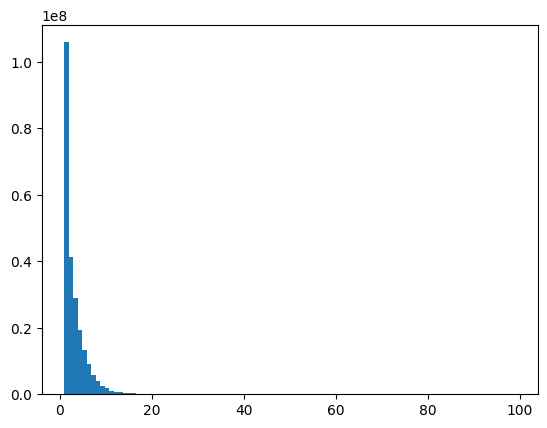

In [13]:
def bucketize(res: dict[int, int]):
    ls = sorted(res.items(), key=lambda x: x[0])
    return ls
    # ranges = [(ls[i][0], ls[i+1][0]) for i in range(len(ls) - 1)] + [(ls[-1][0], 9999999999999999)]
    
    # return list(zip(ranges, map(lambda x: x[1], ls)))

import matplotlib.pyplot as plt
bucketized = [(s, v) for s, v in bucketize(res[0][0]) if s < 100]
starts = [r1 for r1, _ in bucketized]
values = [v for _, v in bucketized]

# intervals = [(r1, r2) for (r1, r2), _ in bucketized]
# values = [v for _, v in bucketized]

# Create a histogram with uneven sized intervals, e.g. by just drawing bars of different widths
%matplotlib inline
plt.hist(starts, weights=[v if s < 100 else 0 for (s, v) in bucketized], bins=100)
plt.show()



In [21]:
duckdb.sql("""
with oa_works as (select * from read_parquet('data/oalex/oa_works_unrolled_authors_parquet/*.parquet')),
     oa_author_ids as (select id from read_parquet('data/oalex/oa_authors_merged_parquet/*.parquet'))
select count(*) from oa_works right join oa_author_ids on oa_works.author_id = oa_author_ids.id""").show()
# select count(*) from oa_works""").show()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│    681918018 │
└──────────────┘



In [23]:
duckdb.sql(f"copy (with works as (select id, doi, best_oa_location->>'is_oa' as is_oa, unnest(authorships) as authorship from works_full) select id, doi, is_oa, authorship['author']['id'] as author_id from works) to 'data/oalex/parquet/work_author_index_parquet' (FORMAT 'parquet', CODEC 'zstd', PER_THREAD_OUTPUT, OVERWRITE)").show()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

AttributeError: 'NoneType' object has no attribute 'show'

In [13]:
duckdb.sql(f"select count(*), sum(case when doi is not null then 1 else 0 end) from 'data/oalex/oa_works_unrolled_authors_parquet/*.parquet' limit 10").show()

┌──────────────┬─────────────────────────────────────────────────────────┐
│ count_star() │ sum(CASE  WHEN ((doi IS NOT NULL)) THEN (1) ELSE 0 END) │
│    int64     │                         int128                          │
├──────────────┼─────────────────────────────────────────────────────────┤
│    683767734 │                                               489133592 │
└──────────────┴─────────────────────────────────────────────────────────┘



In [15]:
duckdb.sql("select count(*) as total_works, sum(case when is_oa = true then 1 else 0 end) as total_oa_works, sum(case when is_oa = true then 1 else 0 end) / count(*) as ratio from 'data/oalex/oa_works_isoa_merged_parquet/*.parquet'").show()

┌─────────────┬────────────────┬─────────────────────┐
│ total_works │ total_oa_works │        ratio        │
│    int64    │     int128     │       double        │
├─────────────┼────────────────┼─────────────────────┤
│   258602038 │       59948268 │ 0.23181668815773215 │
└─────────────┴────────────────┴─────────────────────┘



In [5]:
duckdb.sql(f"select * from read_parquet('data/oalex/oa_authors_merged_parquet/*.parquet') limit 10").show()

┌──────────────────────────────────┬─────────┬────────────────────────────────────────────────────────────────┬───────────────────────────┬─────────────┬────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [12]:
duckdb.sql(f"select best_oa_location['is_oa'] from read_json('data/oalex/works/*/*.gz') where best_oa_location['is_oa'] is false limit 10").fetchall()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [10]:
%%sql res <<
WITH field_props AS (
SELECT id,
display_name,
# affiliations,
summary_stats,
list_transform(topics, x -> {'display_name': x['field']['display_name'], 'count': x['count']}) AS field_proportions,
list_sum(list_transform(topics, x -> x['count'])) AS field_sum
FROM authors 
WHERE json_array_length(topics) > 0 -- LIMIT 5
)
, counts AS (SELECT 
id, 
display_name,
field_sum,
list_sum(list_transform(field_proportions, x -> CASE WHEN x['display_name'] = 'Psychology' THEN x['count'] ELSE 0 END))
AS field_social FROM field_props),
proportions AS (
SELECT id, 
display_name,
field_sum,
field_social,
CASE WHEN field_social > 0 THEN field_social::FLOAT / field_sum::FLOAT ELSE 0.0 END AS social_sciences_proportion
FROM counts)
, final_t AS (SELECT * FROM proportions 
            WHERE social_sciences_proportion > 0.5 AND field_social >= 5
              )
SELECT * FROM final_t USING SAMPLE 2000;
# SELECT * FROM final_t order by field_sum desc limit 100;



In [ ]:
res

In [19]:
%%sql res <<
WITH unrolled_topics AS (SELECT unnest(topics) as topic from authors)
select topic['subfield']['display_name'] as field_name, count(*) as count from unrolled_topics group by field_name order by count desc;


In [22]:
# search for neurosience in field_name 
df = res.DataFrame()

In [6]:
%config SqlMagic.displaylimit = 50


%sql describe works_open;

column_name,column_type,null,key,default,extra
id,VARCHAR,YES,None,None,None
doi,VARCHAR,YES,None,None,None
doi_registration_agency,VARCHAR,YES,None,None,None
display_name,VARCHAR,YES,None,None,None
title,VARCHAR,YES,None,None,None
publication_year,BIGINT,YES,None,None,None
publication_date,DATE,YES,None,None,None
language,VARCHAR,YES,None,None,None
ids,"STRUCT(openalex VARCHAR, doi VARCHAR, pmid VARCHAR, mag BIGINT, pmcid VARCHAR, arxiv_id VARCHAR)",YES,None,None,None
primary_location,"STRUCT(source STRUCT(id VARCHAR, issn_l VARCHAR, issn VARCHAR[], display_name VARCHAR, publisher VARCHAR, host_organization VARCHAR, host_organization_name VARCHAR, host_organization_lineage VARCHAR[], host_organization_lineage_names VARCHAR[], is_oa BOOLEAN, is_in_doaj BOOLEAN, host_institution_lineage VARCHAR[], host_institution_lineage_names VARCHAR[], publisher_lineage VARCHAR[], publisher_lineage_names VARCHAR[], publisher_id VARCHAR, ""type"" VARCHAR), pdf_url VARCHAR, landing_page_url VARCHAR, is_oa BOOLEAN, ""version"" VARCHAR, license JSON, doi VARCHAR, is_accepted BOOLEAN, is_published BOOLEAN)",YES,None,None,None


In [10]:
%sql select count(*) from works_open where (type = 'article' or type = 'preprint') and abstract_inverted_index['statistically'] != [];



count_star()
688934


In [18]:
%sql select TRY_CAST(biblio['last_page'] AS INTEGER) - TRY_CAST(biblio['first_page'] AS INTEGER) as num_pages from works_open limit 10;

num_pages
None
None
None
None
8
None
None
7
21
19


In [49]:
%%sql res <<
with proc1 as (select (TRY_CAST(biblio['last_page'] AS INTEGER) - TRY_CAST(biblio['first_page'] AS INTEGER)) as num_pages, concepts[1]['display_name'] as field_name, *from works_open),
filtered as (select * from proc1 where
             num_pages is not null and
             num_pages < 15 and
             (type = 'article' or type = 'preprint')  and
             field_name is not null and 
            #  abstract_inverted_index['statistically'] != [] and
             field_name = 'Medicine')
# select field_name, avg(num_pages) as avg_num_pages from filtered group by field_name order by avg_num_pages desc;
select id from filtered using sample 500 rows (reservoir, 1235);

# select concepts[1]['display_name'] as field_name, count(*) as count from works_open  where (type = 'article' or type = 'preprint') and abstract_inverted_index['statistically'] != [] group by field_name order by count desc;



In [ ]:
pd.DataFrame(res)

In [51]:
import json


with open("sampled_work_ids_med.txt", "a") as f:
    f.write("\n".join(pd.DataFrame(res)[0].tolist()))


In [24]:
df

,field_name,count
0,Molecular Biology,17759189
1,Surgery,13971216
2,Sociology and Political Science,12168063
3,Electrical and Electronic Engineering,12076421
4,Education,10823597
...,...,...
239,Nuclear Energy and Engineering,32869
240,Acoustics and Ultrasonics,32128
241,Medical Terminology,27981
242,Computational Mathematics,17420


In [17]:
%sql select list_transform(topics, x -> x['subfield']['display_name']) from authors limit 10;

"list_transform(topics, (x -> x['subfield']['display_name']))"
None
None
None
None
None
None
None
None
None
['Anthropology']


In [18]:
%sql select topics from authors limit 10;

topics
None
None
None
None
None
None
None
None
None
"[{'id': 'https://openalex.org/T13705', 'display_name': 'Australian Indigenous Languages and Cultures', 'subfield': {'id': 'https://openalex.org/subfields/3314', 'display_name': 'Anthropology'}, 'field': {'id': 'https://openalex.org/fields/33', 'display_name': 'Social Sciences'}, 'domain': {'id': 'https://openalex.org/domains/2', 'display_name': 'Social Sciences'}, 'count': 1}]"


In [7]:
%sql describe work_author_index

column_name,column_type,null,key,default,extra
id,VARCHAR,YES,None,None,None
doi,VARCHAR,YES,None,None,None
is_oa,VARCHAR,YES,None,None,None
author_id,VARCHAR,YES,None,None,None


In [8]:
# import pandas as pd
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # print([x[0] for x in res])

author_ids = [x[0] for x in res]

sql_in_string = "'" + "','".join(author_ids) + "'"

works_res = ipython.run_line_magic('sql', f"select id from work_author_index where author_id in ({sql_in_string}) and is_oa = true")



In [9]:
import json


sampled_work_ids = [x[0] for x in works_res]
with open('sampled_work_ids.json', 'w') as f:
    json.dump(sampled_work_ids, f)  # noqa: F821

# %sql select * from works_full where id in ({sql_in_string})
